In [1]:
%load_ext autoreload  
%autoreload 2  

In [2]:
from ocpy.data import Data
# data okuma check

data = Data.from_file("ny_vir.xlsx")
data = data.calculate_weights()

q =  0.0
a =  0.0
b =  0.0
amp =  0.0002
e =  0.0
omega =  0.0
P =  80000.0
T0 =  60000.0
amp =  5e-05
e =  0.0
omega =  0.0
P =  40000.0
T0 =  30000.0


(<Figure size 1000x540 with 1 Axes>, <Axes: xlabel='Cycle', ylabel='O−C'>)

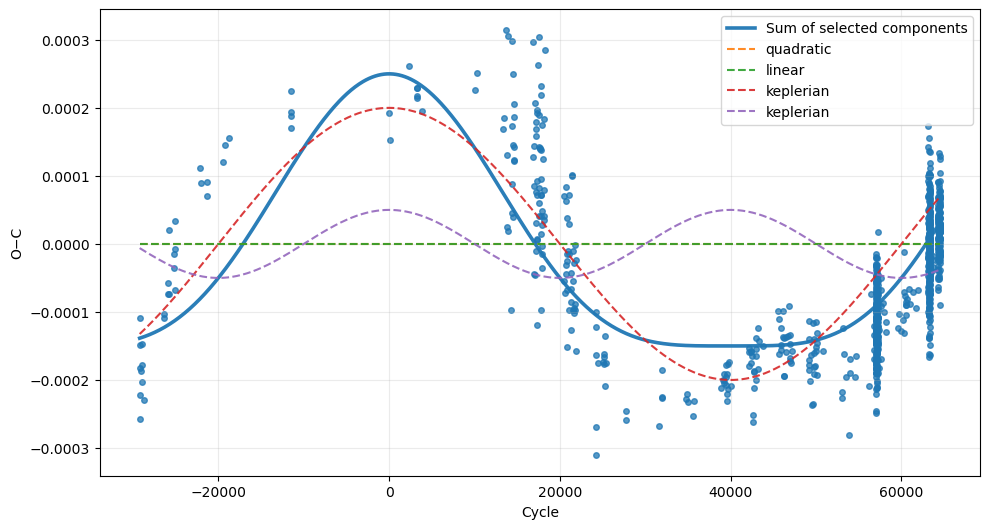

In [3]:
from ocpy.oc import Linear, Quadratic, Keplerian, Parameter

oc = data.calculate_oc(reference_minimum=2453174.442769,
                       reference_period=0.101015969,
                       model_type="pymc")
oc = oc[oc["labels"] != "vis"]

# 1) Linear (y = a*x + b)
lin = Linear(
    a=Parameter(value=0.0,   std=2e-5,  min=-1e-3,  max=1e-3,  fixed=False),
    b=Parameter(value=0.0,   std=2e-3,  min=-0.1,   max=0.1,   fixed=False),
)

# 2) Quadratic (q * x^2)
quad = Quadratic(
    q=Parameter(value=0.0,   std=5e-10, min=-1e-8,  max=1e-8,  fixed=False),
)

# 3) Keplerian #1 (yaklaşık 80k epoch)
lite1 = Keplerian(
    P     = Parameter(value=80000,  std=8_000,  min=30_000,  max=150_000, fixed=False),
    T0    = Parameter(value=60000,  std=5_000,                          fixed=False),
    amp   = Parameter(value=2.0e-4, std=1.0e-4, min=0.0,    max=1.0e-3,  fixed=False),
    e     = Parameter(value=0.0,    fixed=True),
    omega = Parameter(value=0.0,    fixed=True),
)

# 4) Keplerian #2 (yaklaşık 40k epoch)
lite2 = Keplerian(
    P     = Parameter(value=40000,  std=6_000,  min=10_000,  max=100_000, fixed=False),
    T0    = Parameter(value=30000,  std=5_000,                          fixed=False),
    amp   = Parameter(value=5.0e-5, std=2.5e-5, min=0.0,    max=5.0e-4,  fixed=False),
    e     = Parameter(value=0.0,    fixed=True),
    omega = Parameter(value=0.0,    fixed=True),
)

oc.plot_components_on_data([quad, lin, lite1, lite2])


In [4]:
res = oc.fit([lin, quad, lite1, lite2],
             progressbar=True, draws=1000, tune=1000, chains=4,
             target_accept=0.9)

a =  linear1_a
b =  linear1_b
q =  quadratic2_q
amp =  keplerian3_amp
e =  keplerian3_e
omega =  keplerian3_omega
P =  keplerian3_P
T0 =  keplerian3_T0
amp =  keplerian4_amp
e =  keplerian4_e
omega =  keplerian4_omega
P =  keplerian4_P
T0 =  keplerian4_T0


Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [linear1_a, linear1_b, quadratic2_q, keplerian3_amp, keplerian3_P, keplerian3_T0, keplerian4_amp, keplerian4_P, keplerian4_T0]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 157 seconds.


Bilgi: 'linear1_a' parametresi sabit olduğu için grafiğe dahil edilmedi.
Bilgi: 'quadratic2_q' parametresi sabit olduğu için grafiğe dahil edilmedi.
Bilgi: 'keplerian3_e' parametresi sabit olduğu için grafiğe dahil edilmedi.
Bilgi: 'keplerian3_omega' parametresi sabit olduğu için grafiğe dahil edilmedi.
Bilgi: 'keplerian4_e' parametresi sabit olduğu için grafiğe dahil edilmedi.
Bilgi: 'keplerian4_omega' parametresi sabit olduğu için grafiğe dahil edilmedi.


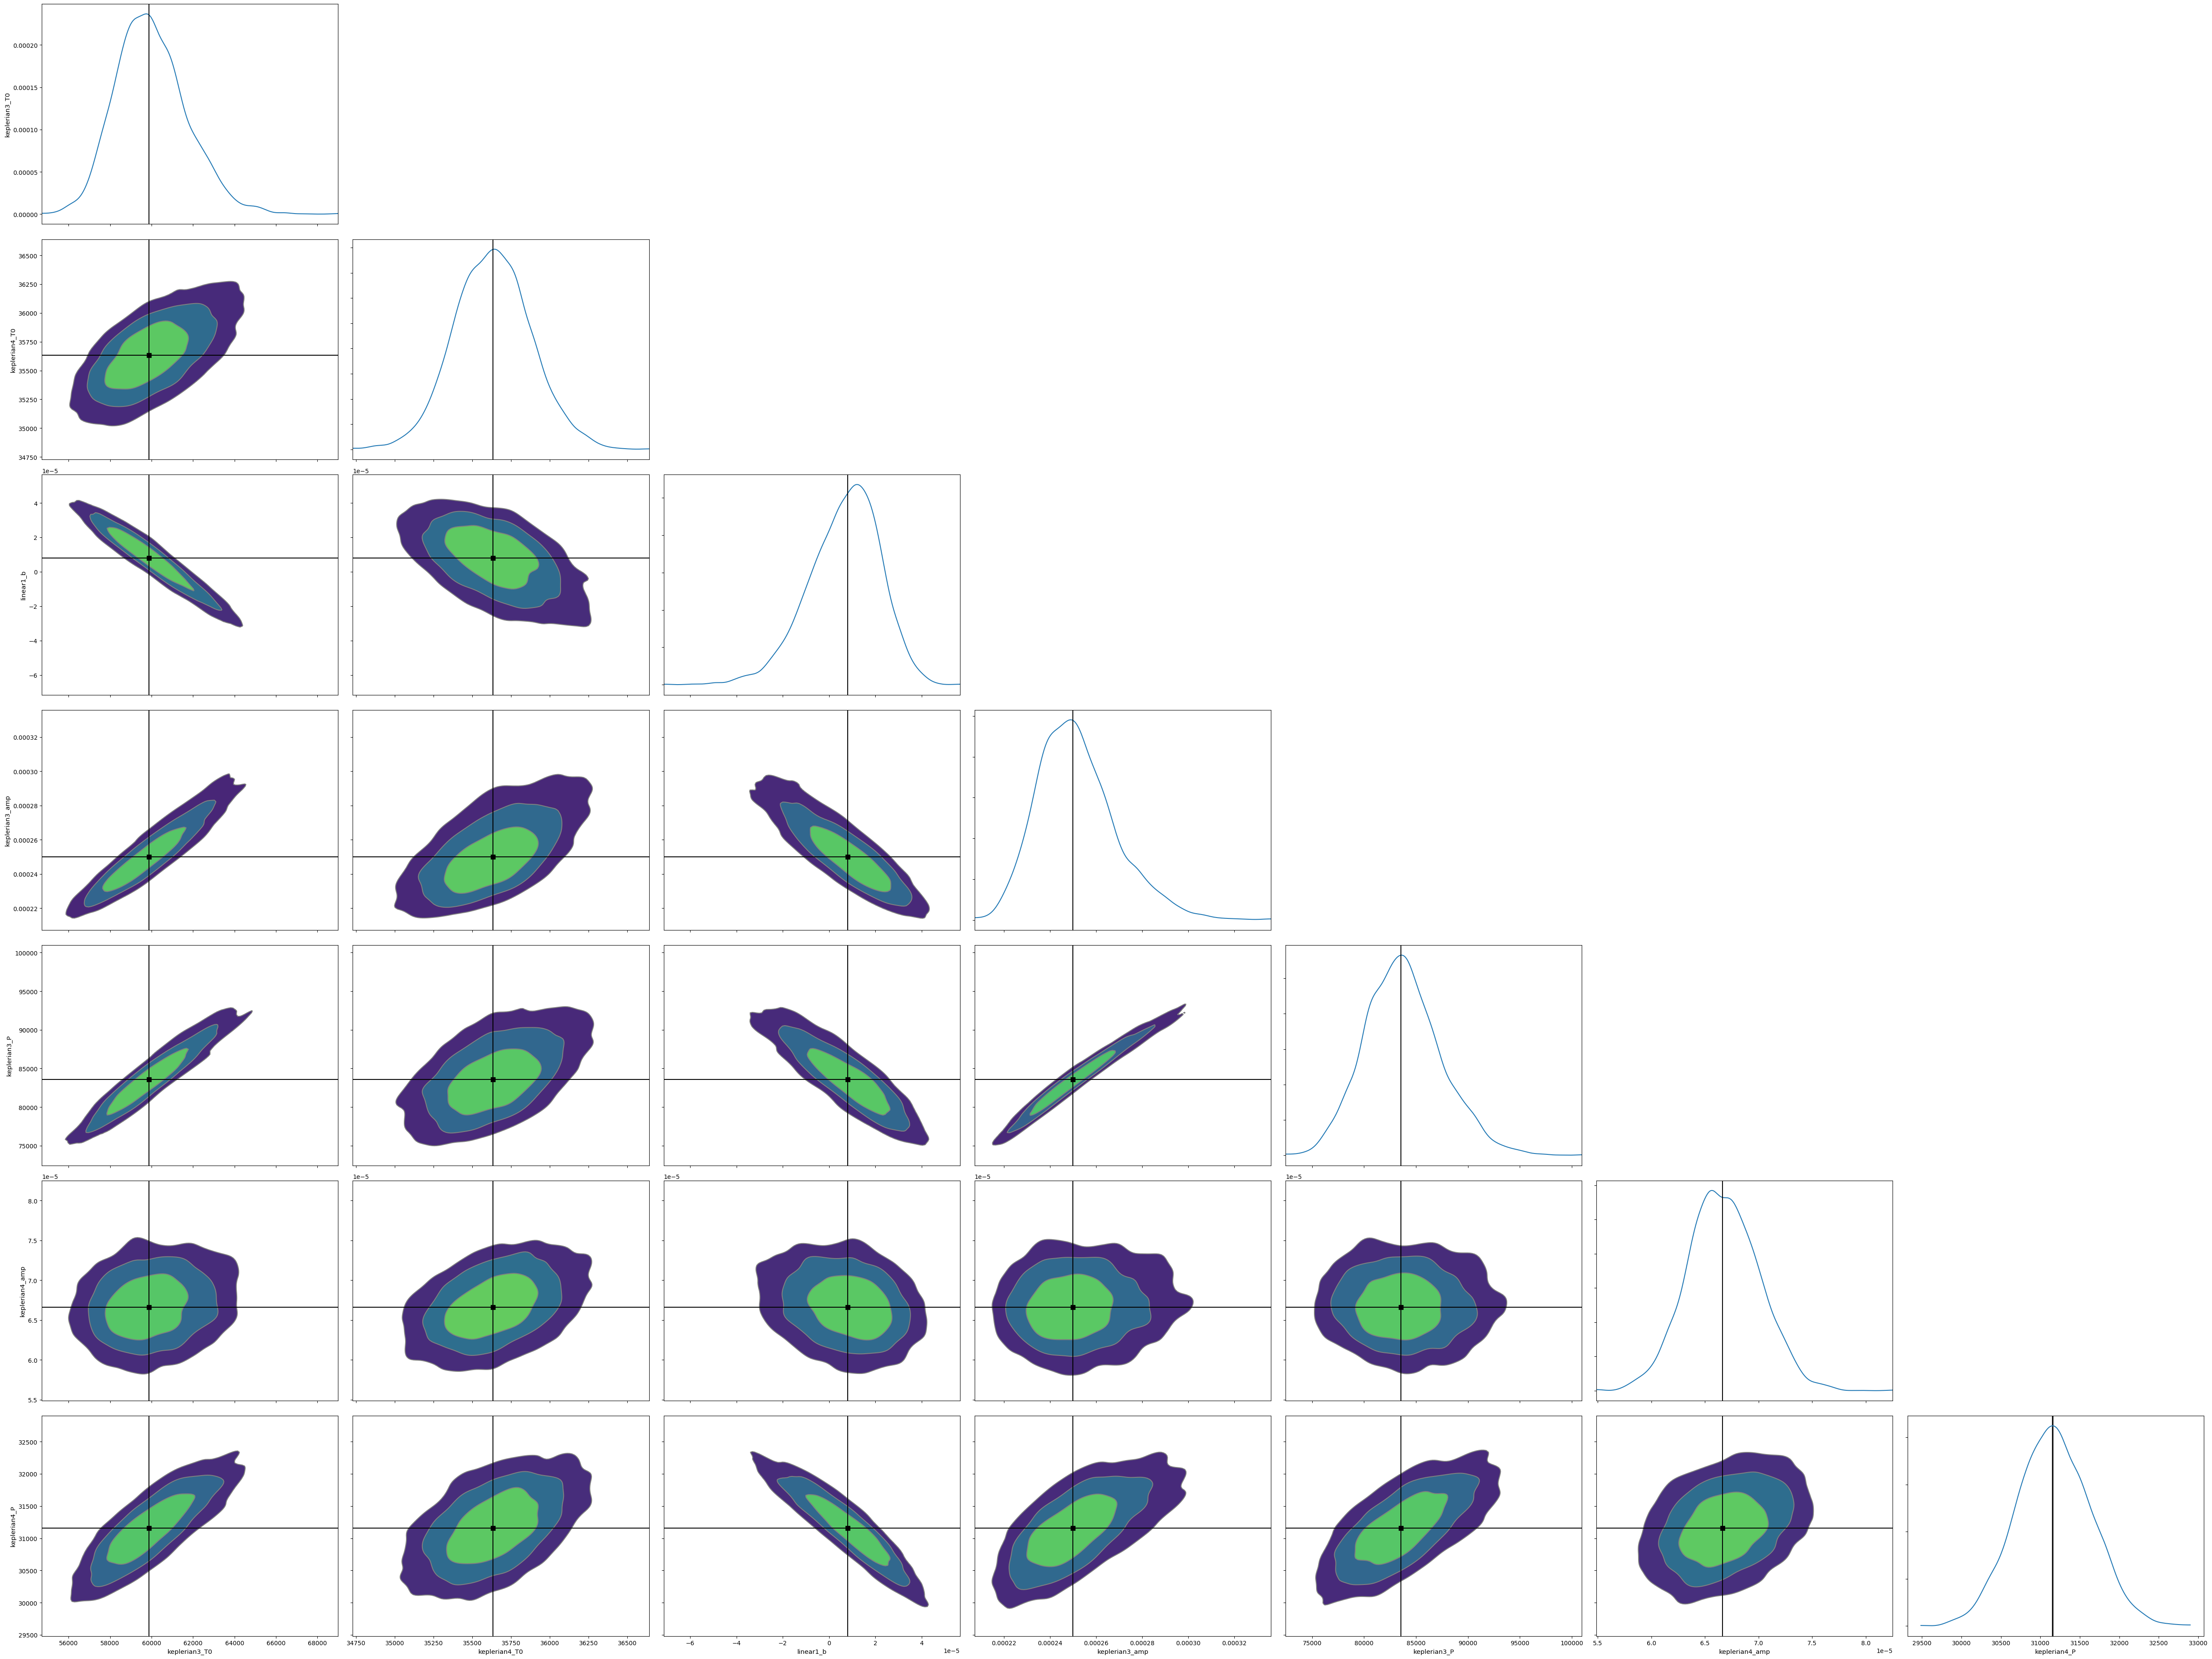

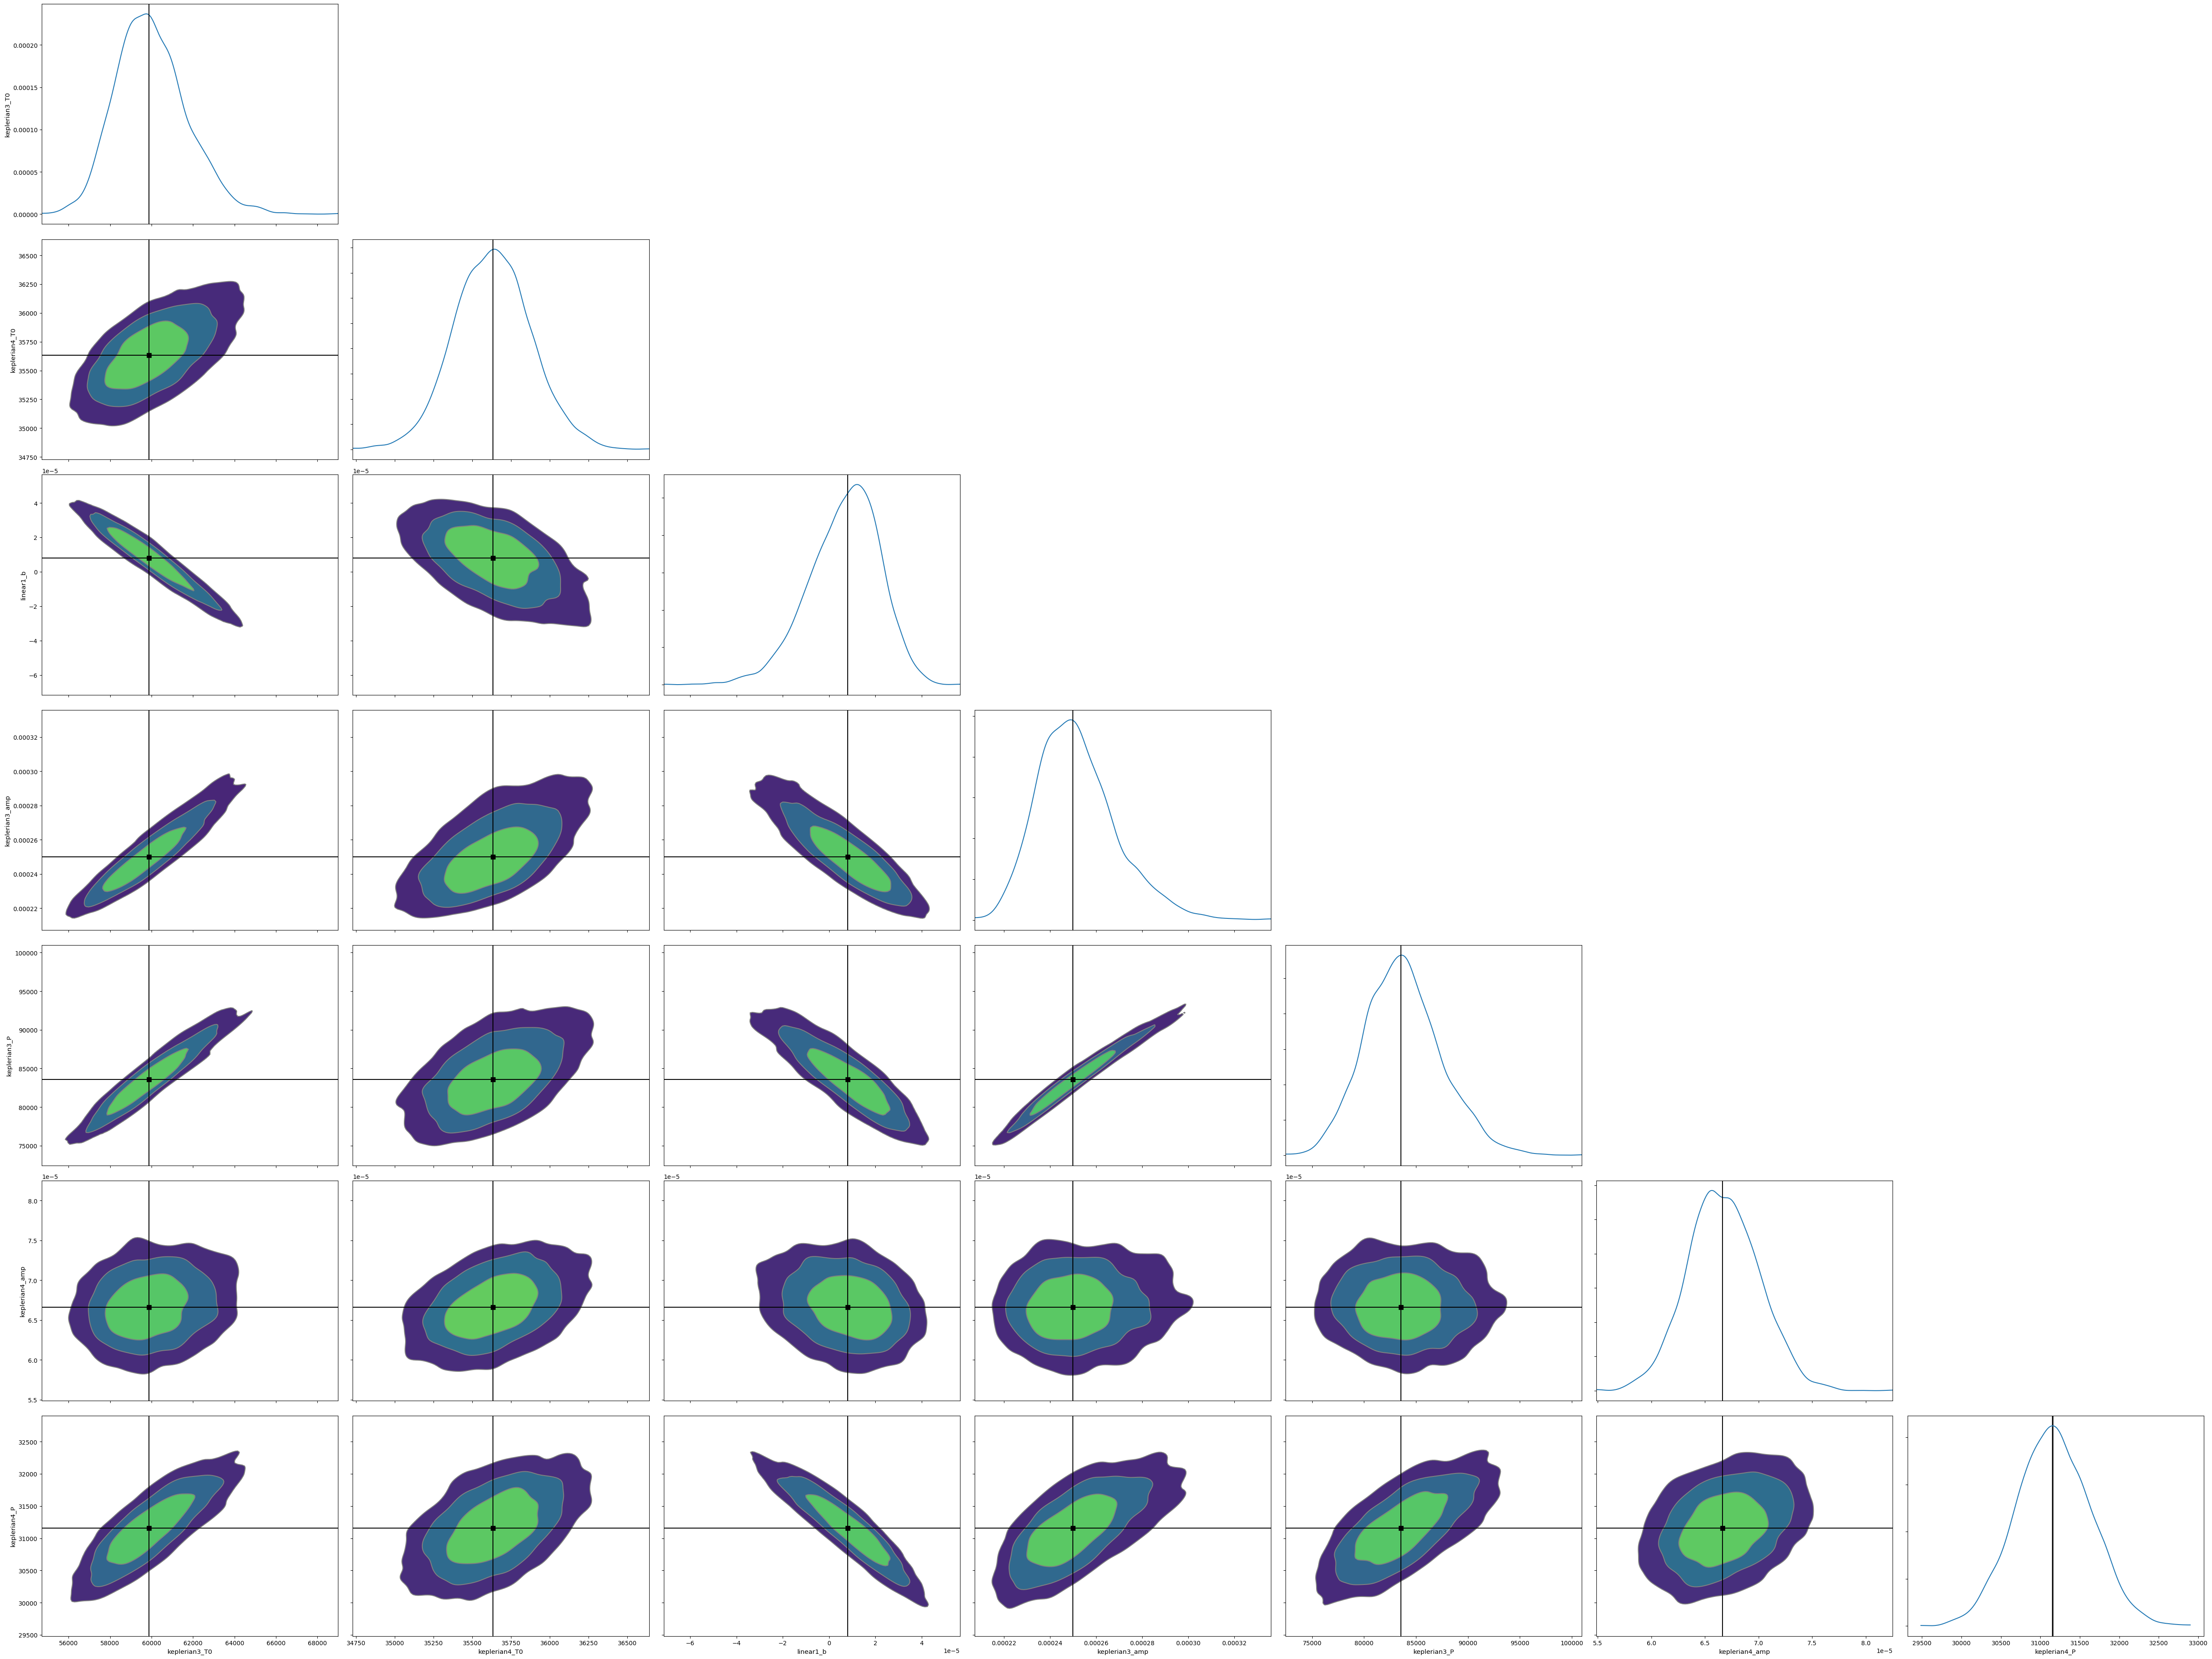

In [5]:
oc.create_corner_plot(res)

In [6]:
res.posterior

<xarray.Dataset> Size: 27MB
Dimensions:           (chain: 4, draw: 1000, y_model_dim_0: 847)
Coordinates:
  * chain             (chain) int64 32B 0 1 2 3
  * draw              (draw) int64 8kB 0 1 2 3 4 5 6 ... 994 995 996 997 998 999
  * y_model_dim_0     (y_model_dim_0) int64 7kB 0 1 2 3 4 ... 843 844 845 846
Data variables: (12/14)
    keplerian3_T0     (chain, draw) float64 32kB 5.644e+04 ... 6.141e+04
    keplerian4_T0     (chain, draw) float64 32kB 3.525e+04 ... 3.58e+04
    linear1_a         (chain, draw) float64 32kB -3.152e-10 ... 1.802e-09
    linear1_b         (chain, draw) float64 32kB 3.565e-05 ... -6.388e-06
    quadratic2_q      (chain, draw) float64 32kB -2.833e-14 ... -2.58e-14
    keplerian3_amp    (chain, draw) float64 32kB 0.0002241 0.000221 ... 0.000265
    ...                ...
    keplerian4_P      (chain, draw) float64 32kB 3.027e+04 ... 3.139e+04
    keplerian3_e      (chain, draw) float32 16kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    keplerian3_omega  (chain, draw) float32 16kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    keplerian4_e      (chain, draw) float32 16kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    keplerian4_omega  (chain, draw) float32 16kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    y_model           (chain, draw, y_model_dim_0) float64 27MB -0.0001742 .....
Attributes:
    created_at:                 2025-11-22T16:21:50.563110+00:00
    arviz_version:              0.22.0
    inference_library:          pymc
    inference_library_version:  5.25.1
    sampling_time:              157.44836616516113
    tuning_steps:               1000

amp =  0.00024998194705947
e =  0.0
omega =  0.0
P =  83568.55872075532
T0 =  59869.32073548408
amp =  6.662807400665004e-05
e =  0.0
omega =  0.0
P =  31156.483022956156
T0 =  35632.89453830299
a =  1.0162012451871324e-09
b =  7.953635321009123e-06
q =  -2.513831443099785e-14


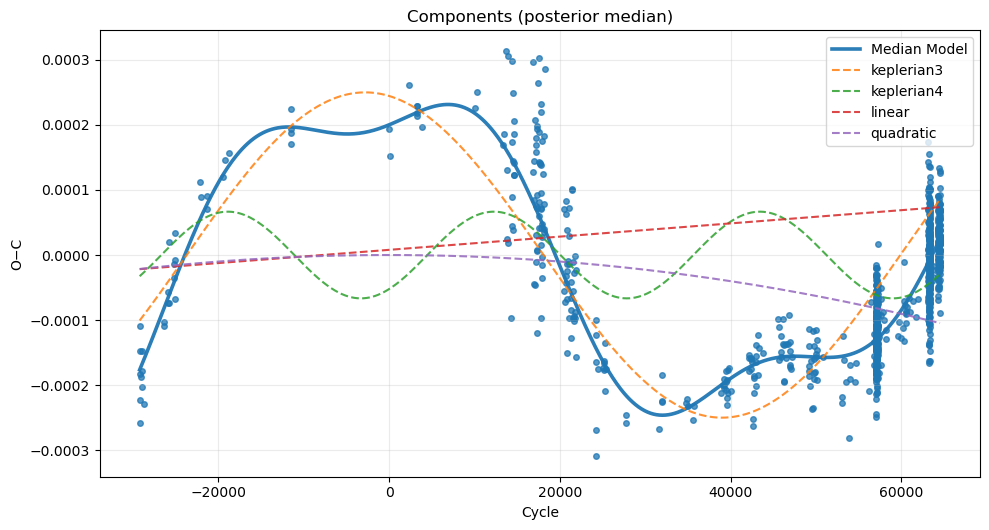

In [7]:
oc.fit_and_report(res)

In [8]:
res.posterior.median()

<xarray.Dataset> Size: 96B
Dimensions:           ()
Data variables: (12/14)
    keplerian3_T0     float64 8B 5.987e+04
    keplerian4_T0     float64 8B 3.563e+04
    linear1_a         float64 8B 1.016e-09
    linear1_b         float64 8B 7.954e-06
    quadratic2_q      float64 8B -2.514e-14
    keplerian3_amp    float64 8B 0.00025
    ...                ...
    keplerian4_P      float64 8B 3.116e+04
    keplerian3_e      float32 4B 0.0
    keplerian3_omega  float32 4B 0.0
    keplerian4_e      float32 4B 0.0
    keplerian4_omega  float32 4B 0.0
    y_model           float64 8B -1.353e-05

q =  -2.464e-14
a =  1.005e-09
b =  7.428e-06
amp =  0.00025
e =  0.0
omega =  0.0
P =  83520.0
T0 =  59890.0
amp =  6.681e-05
e =  0.0
omega =  0.0
P =  31170.0
T0 =  35640.0


(<Figure size 1000x540 with 1 Axes>, <Axes: xlabel='Cycle', ylabel='O−C'>)

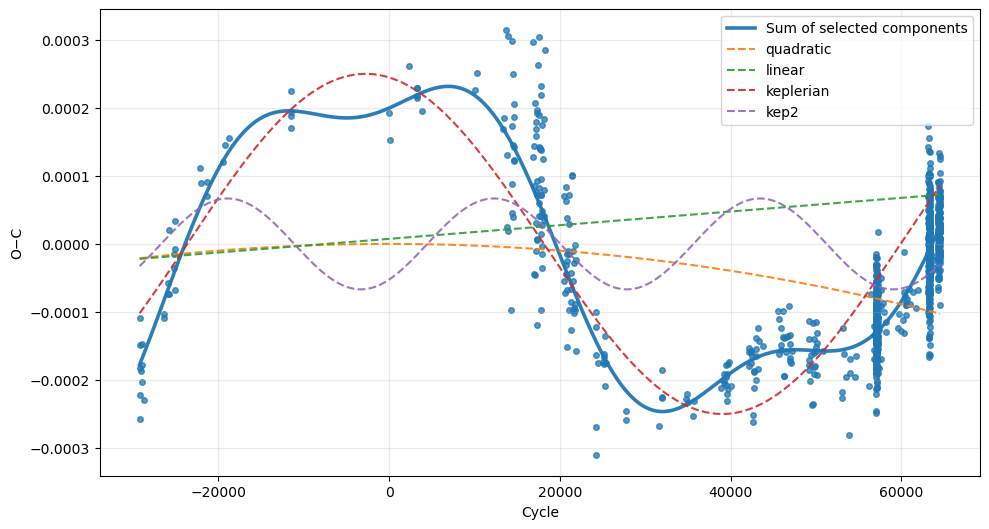

In [9]:
lin = Linear(
    a=Parameter(value=1.005e-09, fixed=False),
    b=Parameter(value=7.428e-06, fixed=False),
)

quad = Quadratic(
    q=Parameter(value=-2.464e-14, fixed=False),
)

lite1 = Keplerian(
    P=Parameter(value=8.352e+04, fixed=False),
    T0=Parameter(value=5.989e+04, fixed=False),
    amp=Parameter(value=0.00025, fixed=False),
    e=Parameter(value=0.0, fixed=True),
    omega=Parameter(value=0.0, fixed=True),
)

lite2 = Keplerian(
    name="kep2",
    P=Parameter(value=3.117e+04, fixed=False),
    T0=Parameter(value=3.564e+04, fixed=False),
    amp=Parameter(value=6.681e-05, fixed=False),
    e=Parameter(value=0.0, fixed=True),
    omega=Parameter(value=0.0, fixed=True),
)

oc.plot_components_on_data([quad, lin, lite1, lite2])